In [3]:
import os    
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

number of images in total -  35126
number of images in total -  35126


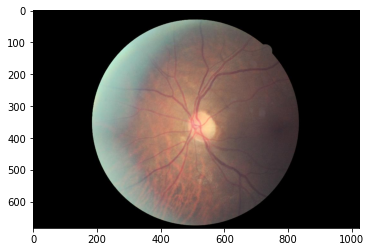

In [4]:
data = "./kaggle_retinopathy_diabetic"
print('number of images in total - ',len(os.listdir(data)))

index = pd.read_csv("./trainLabels.csv") 
print('number of images in total - ',len(index))

#index.info()

temp = data + '//10_left' + '.jpeg'

plt.imshow(plt.imread(temp))

In [5]:
#format correctly
index['image_name'] = [i+".jpeg" for i in index['image'].values]
index['level_binary'] = [i for i in index['level'].values]

# for i in range(len(index.level)):
#     if index['level'][i] == 0:
#         index['level_binary'][i] = 0
#     else:
#         index['level_binary'][i] = 1
    
index.head(10)

,image,level,image_name,level_binary
0,10_left,0,10_left.jpeg,0
1,10_right,0,10_right.jpeg,0
2,13_left,0,13_left.jpeg,0
3,13_right,0,13_right.jpeg,0
4,15_left,1,15_left.jpeg,1
5,15_right,2,15_right.jpeg,2
6,16_left,4,16_left.jpeg,4
7,16_right,4,16_right.jpeg,4
8,17_left,0,17_left.jpeg,0
9,17_right,1,17_right.jpeg,1


In [6]:
plt.imread(temp).shape

(683, 1024, 3)

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=5
EPOCHS=50














// V2 model











In [8]:
train, val = train_test_split(index, test_size=0.2,random_state=42,stratify=index["level"])

In [29]:
train.shape, val.shape

((28100, 4), (7026, 4))

In [10]:
train_datagen = ImageDataGenerator(rescale            = 1/255,
                                   shear_range        = 0.2,
                                   zoom_range         = 0.2,
                                   horizontal_flip    = True,
                                   rotation_range     = 40,
                                   width_shift_range  = 0.2,
                                   height_shift_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1/255)

In [11]:
train_set = train_datagen.flow_from_dataframe(
    train,
    "./kaggle_retinopathy_diabetic",
    x_col="image_name",
    y_col="level",
    class_mode="raw",
    color_mode="rgb",
    batch_size=32,
    target_size=(80, 80))

val_set = val_datagen.flow_from_dataframe(
    val,
    "./kaggle_retinopathy_diabetic",
    x_col="image_name",
    y_col="level",
    class_mode="raw",
   color_mode="rgb",
    batch_size=32,
    target_size=(80, 80))

Found 28100 validated image filenames.
Found 7026 validated image filenames.


In [12]:


model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(80, 80, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 80, 80, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 40, 40, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

In [35]:
model_train = model.fit(
    train_set,
    #steps_per_epoch = 200,
    epochs = 3,
    validation_data = val_set,
    verbose=1
   # validation_steps = 100
)

Epoch 1/3
879/879 [==============================] - 1604s 2s/step - loss: 0.8952 - accuracy: 0.7344 - val_loss: 0.8677 - val_accuracy: 0.7347
Epoch 2/3
879/879 [==============================] - 710s 807ms/step - loss: 0.8809 - accuracy: 0.7348 - val_loss: 0.8719 - val_accuracy: 0.7347
Epoch 3/3
879/879 [==============================] - 648s 737ms/step - loss: 0.8756 - accuracy: 0.7348 - val_loss: 0.8829 - val_accuracy: 0.7347


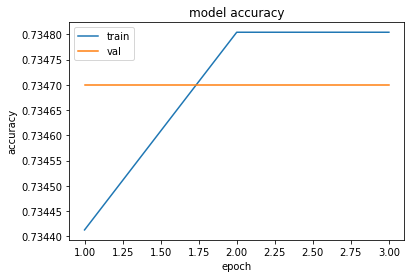

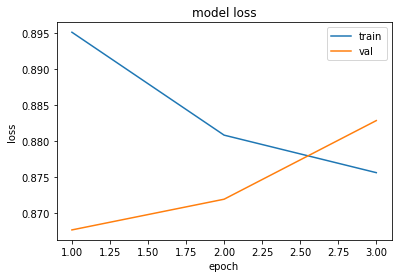

In [36]:
epochs=range(1,len(model_train.history['val_loss'])+1)

plt.title('model accuracy')
plt.plot(epochs,model_train.history['accuracy'])
plt.plot(epochs,model_train.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(epochs,model_train.history['loss'])
plt.plot(epochs,model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

img = load_img('testRD2.jpg', target_size=(80, 80))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
#model = "model.h5"
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y


FileNotFoundError: [Errno 2] No such file or directory: 'testRD2.jpg'

In [16]:
from tensorflow.nn import softmax
from numpy import argmax
from numpy import max
from numpy import array


class_predictions = array(["No DR", "Mild non-proliferative", "Moderate","Severe", "Proliferate"]
)

pred = model.predict(img)
score = softmax(pred[0])

class_prediction = class_predictions[argmax(score)]
model_score = round(max(score) * 100, 2)
class_prediction

'Moderate'